# Analyzing stocks and how they progressed throughout the financial crisis


This data project focuses on exploratory data analysis of stock prices throughout the finantial crisis of 2007-2008 all the way to 2016. This finantial crisis been one of the most serious finantial crisis since the great depression in the 1930.

In [218]:
# Imports
from pandas_datareader import data
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly
import cufflinks as cf
cf.go_offline()

## Data

Using pandas data reader, I will be using the stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

**For the dates Jan 1st 2006 to Jan 1st 2016, I will be using Yahoo finance for the data as google finanace API is depreciated

In [2]:
# Import Data
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

# Bank of America
BoAC = data.DataReader('BAC', 'yahoo', start, end)
# CititGroup
Citigroup = data.DataReader("C", "yahoo", start, end)
# Goldman Sachs
GoldS = data.DataReader("GS", "yahoo", start, end)
# JPMorgan Chase
JPMorgan  = data.DataReader("JPM", "yahoo", start, end)
# Morgan Stanley
MorganS = data.DataReader("MS", "yahoo", start, end)
# Wells Fargo
WellsF = data.DataReader("WFC", "yahoo", start, end)

In [1]:
# Creating a list of tickers in alphabetical order
tickers = ["BAC", "C", "GS", "JPM", "MS", "WFC"]

In [34]:
# concatenating all the data into one, with their respective ticker heading
bank_stocks = pd.concat([BoAC, Citigroup, GoldS, JPMorgan, MorganS, WellsF], axis = 1, keys = tickers)
bank_stocks.columns.names = ['Bank Ticker','Stock Info']
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   36.147552  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   35.763645  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   35.809727  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   35.755962  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   35.779007  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  38.834549  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  38.861198  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  38.967754  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  39.007713  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  39.420616  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  21.693670  
2006-01-04   31.799999  31.530001  10870000.0  21.442055  
2006-01-05   31.500000  31.495001  10158000.0  21.418251  
2006-01-06   31.580000  31.680000   8403800.0  21.544062  
2006-01-09   31.674999  31.674999   5619600.0  21.540665  

[5 rows x 36 columns]

In [88]:
# Max close price for each bank
bank_stocks.xs(key="Close",level="Stock Info", axis=1).max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

** Finding returns for each bank. The returns are given by the following formula**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [173]:
# Creating returns DataFrame, which calculates the returns for each Bank
returns =bank_stocks.xs(key="Close", level="Stock Info", axis=1).pct_change()
returns_df = pd.DataFrame(returns.values, columns = ["BAC Return", "C Return", "GS Return", "JPM Return", "MS Return", "WFC Return"])
returns_df["Date"] = bank_stocks.index
returns_df.set_index(["Date"], inplace=True)
returns_df.head()

BAC Return  C Return  GS Return  JPM Return  MS Return  WFC Return
Date                                                                          
2006-01-03         NaN       NaN        NaN         NaN        NaN         NaN
2006-01-04   -0.010620 -0.018462  -0.013812   -0.014183   0.000686   -0.011599
2006-01-05    0.001288  0.004961  -0.000393    0.003029   0.002742   -0.001110
2006-01-06   -0.001501  0.000000   0.014169    0.007046   0.001025    0.005874
2006-01-09    0.000644 -0.004731   0.012030    0.016242   0.010586   -0.000158

In [174]:
# returns_df[1:] because the very first column is NaN
sns.pairplot(returns_df[1:])

In [190]:
# The date for the worst percent change
returns_df.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

Here for 4 of the banks the worst percent change occured on the same date. If we search this date on google we get that this date also happened to be "The Inauguration of President Barack Obama". Still not sure how those events could be related but it seems like they are.

In [191]:
# Best percent change
returns_df.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [192]:
returns_df.std()

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

During this whole period, owning shares of CitiGroup would be the riskiest as the spread of thier stocks varies the most day to day.

In [195]:
returns_df.loc["2015-01-01":"2015-12-30"].std()

BAC Return    0.016175
C Return      0.015306
GS Return     0.014061
JPM Return    0.014034
MS Return     0.016263
WFC Return    0.012602
dtype: float64

During 2015, owning shares of Morgan Stanley is the most dangerous as the spread of their stocks that year varried the most. 

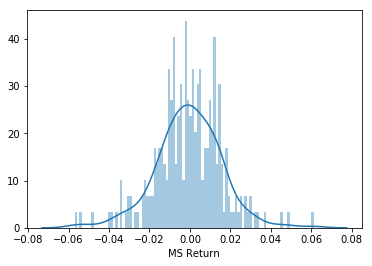

In [215]:
# A distribution plot of Morgan Stanley returns during 2015
sns.distplot(returns_df.loc["2015-01-01":"2015-12-30"]["MS Return"], bins=100)

In [217]:
# A distribution pot of CitiGroup returns during 2008
sns.distplot(returns_df.loc['2008-01-01':'2008-12-30']["C Return"], bins=100)

Comparing the standard deviation of CitiGroup vs Morgan Stanley, we can see that the standard deviation of CitiGroup is a lot more streached out. This implies that some significant event happend for them that year.

In [219]:
sns.set_style('whitegrid')

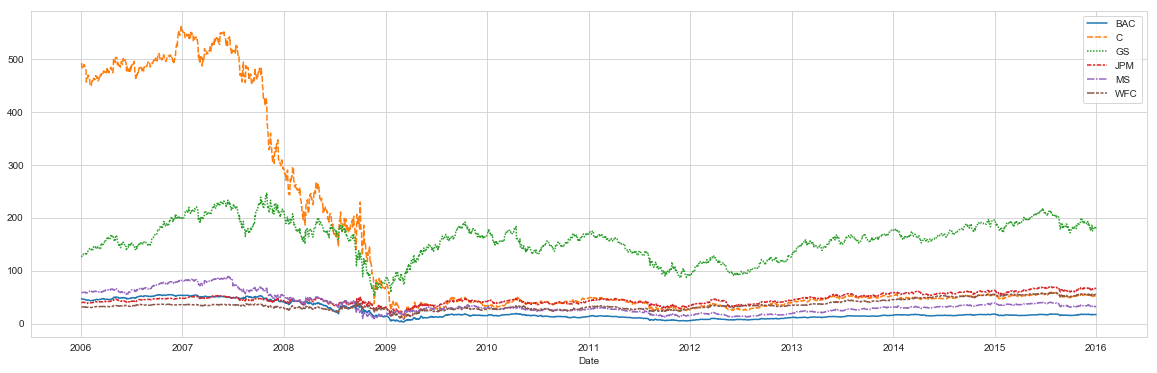

In [240]:
Closed_data = bank_stocks.xs(level="Stock Info", key="Close", axis=1)
plt.figure(figsize=(20, 6))
sns.lineplot(data=Closed_data)

We can see that the year 2008-2010 for CitiGroup were quite volities, which goes hand in hand with Citigroups large standard deviation. Unfortuanately, they still to this day have not recovered from the finantial crash of 2007-2008.

In [242]:
bank_stocks.xs(level="Stock Info", key="Close", axis=1).iplot()

Here is a dynamic graph created using cufflinks iplot, and you can see that every bank from 2007-2008 suffered greatly from crash. However most of them bouced back with the exception of CitiGroup. Note that these plots allow you to zoom in you just have to drag you mouse.

In [259]:
# Moving Average
plt.figure(figsize=(12,6))
BoAC["Close"].loc["2008-01-01":"2009-01-01"].rolling(30).mean().plot(label="30 Day Average")
BoAC["Close"].loc["2008-01-01":"2009-01-01"].plot(label="Bank of America")
plt.legend()

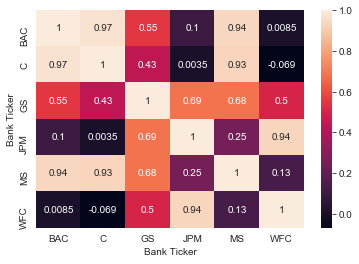

In [270]:
# Heatmap analysis
HeatmapData = bank_stocks.xs(level="Stock Info", key = "Close", axis=1)
sns.heatmap(HeatmapData.corr(), annot=True)

In [272]:
sns.clustermap(HeatmapData.corr(), annot=True)

From the cluster map we can see that BAC, C, MS bank stocks are quite correlated with each other and then JPM and WFC stocks are quite correlated. GS oddly enough is that correlated with any of the banks, this we can also see from the iplot(), GS was able to jump back after the great recession better than any of the other banks.

In [273]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

In [276]:
BoAC[["High", "Low", "Open", "Close"]].loc["2015-01-01":"2016-01-01"].iplot(kind='candle')

Dynamic candle plot showing the Bank of America stocks

In [285]:
MorganS["Close"].loc["2015-01-01":"2016-01-01"].ta_plot(study='sma',periods=[10, 20,30])

We can see as we increase the time of the moving average from 10 days to 20 days to 30 days and so on. The moving average line smoothes out showing the general trend of the stock.

In [290]:
BoAC["Close"].loc["2015-01-01":"2016-01-01"].ta_plot(study='boll', periods=[30])

30 day Upper, lower and middle moving averages for Bank of America. We can also see that the moving averages are able to predict the stocks quite well which is one of the reasons it is used quite often in machine learning applications.